In [1]:
import os

from IPython.display import Image

import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2
from rpy2.robjects.functions import SignatureTranslatedFunction

import pandas as pd

import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

import warnings
warnings.filterwarnings("ignore")

/Users/costi/opt/anaconda3/envs/bioinformatics_r/lib/python3.10/site-packages/rpy2/robjects/lib/ggplot2.py:70: UserWarning: This was designed againt ggplot2 versions starting with 3.3. but you have 3.4.1
  warnings.warn(


In [2]:
read_delim = robjects.r('read.delim')
seq_data = read_delim('sequence.index', header=True, stringsAsFactors=False)

In [3]:
print('This dataframe has %d columns and %d rows' %(seq_data.ncol, seq_data.nrow))
print(seq_data.colnames)

This dataframe has 26 columns and 187720 rows
 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     



In [4]:
print('Columns in Python %d ' % robjects.r.ncol(seq_data)[0])

Columns in Python 26 


In [5]:
my_cols = robjects.r.ncol(seq_data) ## most operations in R return vectors
print(my_cols) ## R array indexing starts with 1, Python with 0 (OJO)

[1] 26



In [6]:
print (my_cols[0]) ## number of columns 

26


In [7]:
as_integer = robjects.r('as.integer') ## as_integer function will convert a column into integers
match = robjects.r.match ## match function is somewhat similar to the index method in Python lists

In [8]:
my_col = match('READ_COUNT', seq_data.colnames)[0] #vector returned
print('Type of read count before as.integer: %s' % seq_data[my_col - 1].rclass[0])
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])
print('Type of read count after as.integer: %s' % seq_data[my_col - 1].rclass[0])

Type of read count before as.integer: character
Type of read count after as.integer: integer


In [9]:
my_col = match('BASE_COUNT', seq_data.colnames)[0] # Vector returned
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])

In [10]:
my_col = match('CENTER_NAME', seq_data.colnames)[0]
seq_data[my_col - 1] = robjects.r.toupper(seq_data[my_col - 1])

In [11]:
robjects.r.assign('seq.data', seq_data) ## create a variable in the R namespace called seq.data

FASTQ_FILE,MD5,RUN_ID,...,READ_COUNT,BASE_COUNT,ANALYSIS_GROUP
'data/NA1...,'3b092ef1...,'ERR000018',...,9280498,334097928,'high cov...
'data/NA1...,'fcb89b0a...,'ERR000019',,9571982,344591352,'high cov...
'data/NA1...,'dcd4ff7d...,'ERR000020',,149044,5365584,'high cov...
'data/NA1...,'fb5d7eb5...,'ERR000020',,2057690,74076840,'high cov...
...,...,...,,...,...,...
'data/HG0...,'25947403...,'SRR824935',,2173448,165182048,'exome'
'data/HG0...,'1176aaea...,'SRR824936',,10250,779000,'exome'
'data/HG0...,'4ae5b931...,'SRR824936',,2403340,182653840,'exome'
'data/HG0...,'f87ba955...,'SRR824936',,2403340,182653840,'exome'


In [12]:
robjects.r('seq.data <- seq.data[seq.data$WITHDRAWN==0, ]') ## remove all withdrawn sequences

FASTQ_FILE,MD5,RUN_ID,...,READ_COUNT,BASE_COUNT,ANALYSIS_GROUP
'data/NA1...,'3b092ef1...,'ERR000018',...,9280498,334097928,'high cov...
'data/NA1...,'fcb89b0a...,'ERR000019',,9571982,344591352,'high cov...
'data/NA1...,'dcd4ff7d...,'ERR000020',,149044,5365584,'high cov...
'data/NA1...,'fb5d7eb5...,'ERR000020',,2057690,74076840,'high cov...
...,...,...,,...,...,...
'data/HG0...,'25947403...,'SRR824935',,2173448,165182048,'exome'
'data/HG0...,'1176aaea...,'SRR824936',,10250,779000,'exome'
'data/HG0...,'4ae5b931...,'SRR824936',,2403340,182653840,'exome'
'data/HG0...,'f87ba955...,'SRR824936',,2403340,182653840,'exome'


In [13]:
robjects.r("seq.data <- seq.data[, c('STUDY_ID', 'STUDY_NAME', 'CENTER_NAME', 'SAMPLE_ID', 'SAMPLE_NAME', 'POPULATION', 'INSTRUMENT_PLATFORM', 'LIBRARY_LAYOUT', 'PAIRED_FASTQ', 'READ_COUNT', 'BASE_COUNT', 'ANALYSIS_GROUP')]")

STUDY_ID,STUDY_NAME,CENTER_NAME,...,READ_COUNT,BASE_COUNT,ANALYSIS_GROUP
'SRP000032','1000Geno...,'BGI',...,9280498,334097928,'high cov...
'SRP000032','1000Geno...,'BGI',,9571982,344591352,'high cov...
'SRP000032','1000Geno...,'BGI',,149044,5365584,'high cov...
'SRP000032','1000Geno...,'BGI',,2057690,74076840,'high cov...
...,...,...,,...,...,...
'SRP016107','1000 Gen...,'BI',,2173448,165182048,'exome'
'SRP016107','1000 Gen...,'BI',,10250,779000,'exome'
'SRP016107','1000 Gen...,'BI',,2403340,182653840,'exome'
'SRP016107','1000 Gen...,'BI',,2403340,182653840,'exome'


In [14]:
robjects.r('seq.data$POPULATION <- as.factor(seq.data$POPULATION)') ## Population as factor

YRI,YRI,YRI,...,STU,STU,STU


In [16]:
ggplot2.theme = SignatureTranslatedFunction(ggplot2.theme, init_prm_translate = {'axis_text_x': 'axis.text.x'}) ## we must map the axis.text.x (R) to axis_ text_r (PYTHON)
bar = ggplot2.ggplot(seq_data) + ggplot2.geom_bar() + ggplot2.aes_string(x='CENTER_NAME') + ggplot2.theme(axis_text_x=ggplot2.element_text(angle=90, hjust=1, size=20), axis_text_y=ggplot2.element_text(size=20), text=ggplot2.element_text(size=20))
robjects.r.png('out.png', width=20, height=16, units="in", res=600) 
bar.plot()
dev_off = robjects.r('dev.off')
dev_off()
Image(filename='out.png')

In [17]:
## Get Yoruba and CEU

## limit the maximum base and read counts of the dataframe only with YRI and CEU
robjects.r('yri_ceu <- seq.data[seq.data$POPULATION %in% c("YRI", "CEU") & seq.data$BASE_COUNT < 2E9 & seq.data$READ_COUNT < 3E7, ]')
yri_ceu = robjects.r('yri_ceu')

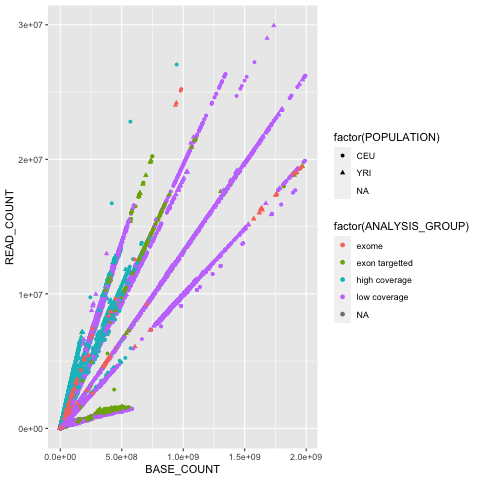

In [18]:
## each point depends on the POPULATION variable and that the color depends on the ANALYSIS_GROUP variable
scatter = ggplot2.ggplot(yri_ceu) + ggplot2.aes_string(x='BASE_COUNT', y='READ_COUNT',shape='factor(POPULATION)', col='factor(ANALYSIS_GROUP)')+ ggplot2.geom_point()
robjects.r.png('out.png')
scatter.plot()
dev_off = robjects.r('dev.off')
dev_off()
Image(filename='out.png')

In [19]:
## rpy2 provides many strategies to convert data from R into Python
## we are converting yri_ceu in the R namespace, not the one on the Python namespace

with localconverter(ro.default_converter + pandas2ri.converter):
    pd_yri_ceu = ro.conversion.rpy2py(yri_ceu)
    
## we delete the column that indicates the name of the paired FASTQ file on the pandas DataFrame and copy it back to the R namespace
del pd_yri_ceu['PAIRED_FASTQ'] 
# no_paired = pandas2ri.py2ri(pd_yri_ceu)
with localconverter(ro.default_converter + pandas2ri.converter):
    no_paired = ro.conversion.py2rpy(pd_yri_ceu)
robjects.r.assign('no.paired', no_paired) ## puntos en r, barrasbajas en python
robjects.r("print(colnames(no.paired))") ## no PAIRED_FASTQ in the columns

 [1] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [4] "SAMPLE_ID"           "SAMPLE_NAME"         "POPULATION"         
 [7] "INSTRUMENT_PLATFORM" "LIBRARY_LAYOUT"      "READ_COUNT"         
[10] "BASE_COUNT"          "ANALYSIS_GROUP"     


'STUDY_ID','STUDY_NA...,'CENTER_N...,...,'READ_COU...,'BASE_COU...,'ANALYSIS...
